### <p style="text-align: right;"> &#9989; Elizabeth Walter</p>

# Day 13 Pre-Class Assignment: Fitting functions to data (curve-fitting) and thinking more about models
<br/>
<img src="https://www.mathworks.com/help/examples/matlab/win64/CurveFittingViaOptimizationExample_01.png" alt="Curve-fitting" width=500px/>


## Goals for today's pre-class assignment

* Think a bit more about fitting functions to data
* Practice using SciPy to fit a specific function to data
* Think broadly about the nature of building and using models to understand the world
* Brainstorm ideas for your semester project

## Assignment instructions

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into the appropriate "Pre-class assignments" submission folder.  If you run into issues with your code, make sure to use Slack to help each other out and receive some assistance from the instructors. Submission instructions can be found at the end of the notebook.

----
## 1. Fitting a function using `curve_fit`

What if we want to fit a different type of function other than a polynomial to our data? So far, we've only been able to fit polynomials because we've only been using the `polyfit()` function from NumPy. Maybe instead of our data having a linear relationship, like $y = mx + b$, the data is sinusoidal or exponential. NumPy's `polyfit` and `poly1d` can't be used to fit non-linear functions like these. Luckily for us, the SciPy library provides us with a function that can: [`curve_fit` (you can click this link to read the documentation)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

**You will not have to write a lot of code in this assignment, but make sure you closely follow along with the code, add snippets when necessary, and answer a couple of questions about what is happening!**

As with many Python packages, we need to import `curve_fit` first!

In [3]:
# import curve_fit function
from scipy.optimize import curve_fit

# import numpy and matplotlib as well while we're at it
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

SciPy's `curve_fit` function takes in three arguments: a function that we define in Python, our $x$ data, and our $y$ data. It then returns an array of parameters that our newly-defined function uses. 

Let's take a look at the example in the cell below. Run the cell and see that our data follows a sinusoidal relationship.

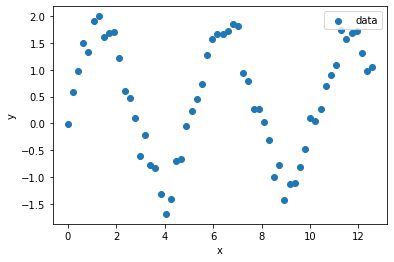

In [4]:
# generate some x data: sixty data points from 0 to 4π
x_sin = np.linspace(0,4*np.pi,60)

# generate some y data: 1.5 * sin(1.2x + 0.5)
# we add the np.random.normal(0.25,.25,60) at the end to add some randomness to the data
y_sin = 1.5 * np.sin(1.2 * x_sin) + np.random.normal(.25,.25,60)

# plot our data
plt.scatter(x_sin, y_sin, label = "data")

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Because this is just simulated data, we know that our "signal" is a sinusoid that has the relationship $y = 1.5 * sin(1.2x)$.

The generic form of a typical sine curve model is:
$$y = A * sin(Bx + C)$$

This means our true parameter values for this specific example are:

* $A = 1.5$
* $B = 1.2$
* $C = 0$

However, we usually don't know the values of these parameters in advance - that's why we use regression & curve fitting!

The first step in using `curve_fit` is that we define the sine function that we want to try to fit to our data. Look at how we've turned the mathematical model into a Python function in the cell below.

In [5]:
def my_sin_function(x, A, B, C):
    # Confirm that information returned by this function matches the mathematical formula from above!
    return A * np.sin(B * x + C)

Next we can run `curve_fit` in the cell below now that we have our function defined and the data we want to fit.

`curve_fit` returns two values: the first is an array of our parameter values. In this example, the array will be $[A, B, C]$.

&#9989;&nbsp; Print out the expected parameter values that from `curve_fit` (these parameters are stored in the `popt` variable)

Are they close to our true values from above?

In [8]:
# Use curve_fit by passing in the sin function, x data, and y data
popt, pcov = curve_fit(my_sin_function, x_sin, y_sin)

# Print the array of fitted parameter values
print(popt)

[ 1.53775918  1.22071313 -0.07424817]


<font size=+3>&#9998;</font> *Put your answer here.*

We can now "unpack" our parameter values and use them in our sine function to get our expected $y$ values based on our model.

**Carefully read this code and make sure you understand it. You will be writing code like this in-class!**

Once we have our fitted curve, we can plot it against the data below!

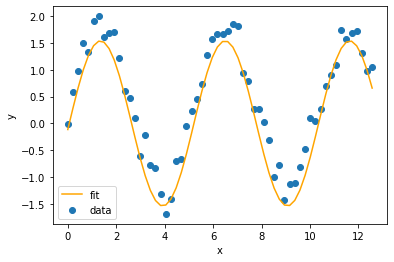

In [7]:
# Unpack the parameter results into separate variables so that we can feed them to our sine function
a_expected = popt[0]  # get fitted A value
b_expected = popt[1]  # get fitted B value
c_expected = popt[2]  # get fitted C value

# use my_sin_function with new parameters to get expected y values
y_sin_expected = my_sin_function(x_sin, a_expected, b_expected, c_expected)


# plot our actual data
plt.scatter(x_sin, y_sin, label = "data")

# plot our fitted curve
plt.plot(x_sin, y_sin_expected, color = "orange", label = "fit")

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

&#9989;&nbsp; Is the fitted sine function from `curve_fit` a "good fit" for our data?

<font size=+3>&#9998;</font> *Record your thoughts here*

---
## 2. Thinking about models and fitting models to data

So far in this course we've been learning a lot of Python basics and exploring data use some special Python tools. But, of course, an important aspect of this course is **computational modeling**, as the title of the course suggests!

That said, before we start heavily thinking about working with computational models, we should really pause to think about what exactly a model *is* and how we might use it.

Watch the following video for an overview of how we can use models to understand the world around us, infer what the models tell us about the underlying data, and predict future events. If the the YouTube video doesn't work, try this [MediaSpace link](https://mediaspace.msu.edu/media/Introduction+to+Computational+Models/1_rcr6iiyk).

**This is a repeat of a video we watched earlier in the semester; Use this to answer the questions below and to help generate ideas for your semester project**

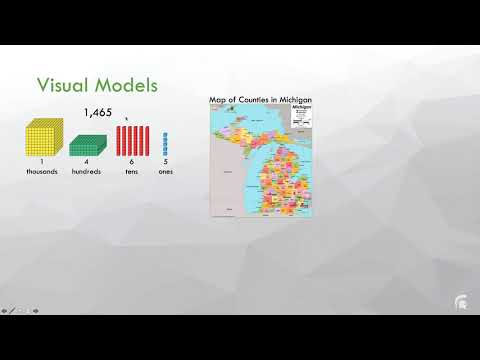

In [6]:
from IPython.display import YouTubeVideo  
YouTubeVideo("7qAunwHsuj8",width=640,height=360)

&#9989;&nbsp; After watching the video, answer the following:
1. In your own words, explain what a model is and why models can be useful.
2. Provide 2-3 examples of different type of models and what type of model that example represents.

<font size=+3>&#9998;</font> *Put your answers here.*

---
## 3. Project brainstorming

For the last part of this pre-class assignment you're going to start thinking about your semester project. **Make sure to read all of the appropriate content and complete the brainstorming section!**

### Semester Project Details

On D2L under the "Semester Project" category, there is now a file called "CMSE201_SemesterProjectDetails.pdf".

&#9989;&nbsp; **Task**: Read that file in its entirety.

### Example projects

Dr. Murillo, an instructor of CMSE 201, put together an example of what a semester project might look like and posted it on his research group's website: https://murillogroupmsu.com/wine/

&#9989;&nbsp; **Task**: Read through his example to get a sense for the kinds of thing you could do for your semester project. Don't worry if there are parts you don't understand, if you decide you want to use some of the python packages he used, there will be time to figure them out!

In additional to that example, there are three additional examples available on D2L. They are named:
* CMSE201_ExampleProject_1.pdf
* CMSE201_ExampleProject_2.pdf
* CMSE201_ExampleProject_3.pdf

&#9989;&nbsp; **Task**: Skim through these examples as well. Again, don't worry if there are parts you don't understand -- we're still learning things in the course! Also, just because these are examples of past projects, it does not necessarily mean that these examples met all of the project requirements. Make sure you have carefully read the project details document as you embark on your project!

#### In addition to those examples, here are some of the project topics from previous semesters:

1. (modeling) comparing classical and quantum mechanics
2. (modeling) gravitational problems, including solar systems and satellites
3. (data) Brexit
4. (data) beer drinking habits
5. (data/modeling) forecasting financial trends
6. (data) machine learning using Python's Scikit Learn
7. (data) global warming trends
8. (modeling) finding the shortest path between two point in a Google map
9. (modeling) molecular dynamics of a two-dimensional fluid
10. (modeling) agent-based model of a fusion in the sun
11. (modeling) a solution to the "Queens Problem" in chess
12. (modeling) agent-based model of people's happiness as a function of city they live in
13. (data) analysis of economic data in Venezuela and how it relates to politics

and so on...

Since we are still early in the semester, it is important to think about not only what you have already learned, but also what you will be learning in the remaining weeks of the semester. You can and should use concepts from the class in your projects that we haven't covered yet. Topics that we still have yet to cover include:
* Solving systems of differential equations to build compartmental models (e.g. to model spread of disease or population dynamics)
* Using agent-based models to determine how individuals rules and actions can lead to large-scale results (e.g. modeling forest fires or social dynamics)
* Using random numbers in models and modeling random walks

and as a reminder, the topics we've covered so far include:

* Writing if statements, for loops, and while loops to calculate values and evolve systems
* Analyzing data with NumPy
* Anaylzing data with Pandas
* Linear regression and fitting models to data.

You are encourage to look up any/all of these topics to gain more insight into them. If any of these ideas intrigue you, talk with your instructor about them to get you kick started before we get to it in class.

### Brainstorming project ideas

Now that you've had a chance to read the semester project details and review some examples of what a project might look like, it's time to start brainstorming some ideas for what sort of topic you might like to explore for your project.

&#9989;&nbsp; **Task**: In each of the *four* markdown cells below, come up with a possible topic that you might want to pursue for your semester project. Along with the topic, brainstorm if you'll try to pursue the topic by analyzing data or if you'll try to create a computational model. You should mention what sort of data or models you think you might want to use to try to answer a questions related to the the topic. Each cell should end up having a short paragraph of your brainstorming ideas.

**Try to come up with two data-driven topics and two modeling-focused topics**.

Try not to spend more than about 20 minutes on this. The idea is to get to you thinking of several projects that would be interesting to you. Later, you will decide on one and propose it to the class in the form of a short presentation. If you feel like you are struggling to come up with project ideas, this is a good time to check in with your instructor!

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Pre-class assignments" folder, find the appropriate submission link, and upload it there.

See you in class!

&#169; Copyright 2020,  [Department of Computational Mathematics, Science and Engineering](https://cmse.msu.edu) at Michigan State University.